In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model
import tensorflow as tf

import matplotlib.pyplot as plt

### Data load

In [2]:
url = 'https://raw.githubusercontent.com/JunetaeKim/DeepLearningClass/main/Dataset/sonar.csv'
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Data preprocessing

In [3]:
dataset = df.values
X = dataset[:, 0:60] # select input columns
Target = dataset[:, 60] # select the target column

e = LabelEncoder() # Instantiation
e.fit(Target) # Fitting
Y = e.transform(Target) # Converting string labels to numeric labels


### Data split

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

### Base experiment

In [5]:
Inp = Input(X_train.shape[-1], )
Hidden1 = Dense(20, 'relu')(Inp)
Hidden2 = Dense(10, 'relu')(Hidden1)
Output = Dense(1, 'sigmoid')(Hidden2)

sonar = Model(Inp, Output)
sonar.compile(loss=tf.losses.binary_crossentropy, optimizer='adam', metrics='accuracy')

In [6]:
history =sonar.fit(X_train.astype('float32'), Y_train, validation_data=(X_test.astype('float32'), Y_test), epochs=130, batch_size=10, shuffle=True)

Epoch 1/130
17/17 [==============================] - 2s 88ms/step - loss: 0.7103 - accuracy: 0.4802 - val_loss: 0.6981 - val_accuracy: 0.5238
Epoch 2/130
17/17 [==============================] - 0s 4ms/step - loss: 0.6852 - accuracy: 0.5902 - val_loss: 0.6892 - val_accuracy: 0.5238
Epoch 3/130
17/17 [==============================] - 0s 4ms/step - loss: 0.6786 - accuracy: 0.5624 - val_loss: 0.6841 - val_accuracy: 0.5238
Epoch 4/130
17/17 [==============================] - 0s 5ms/step - loss: 0.6633 - accuracy: 0.6204 - val_loss: 0.6720 - val_accuracy: 0.5714
Epoch 5/130
17/17 [==============================] - 0s 4ms/step - loss: 0.6523 - accuracy: 0.6660 - val_loss: 0.6615 - val_accuracy: 0.6905
Epoch 6/130
17/17 [==============================] - 0s 4ms/step - loss: 0.6402 - accuracy: 0.7259 - val_loss: 0.6539 - val_accuracy: 0.6190
Epoch 7/130
17/17 [==============================] - 0s 4ms/step - loss: 0.6143 - accuracy: 0.7087 - val_loss: 0.6473 - val_accuracy: 0.6429
Epoch 8/130


### Plot losses over epochs

Text(0, 0.5, 'Loss')

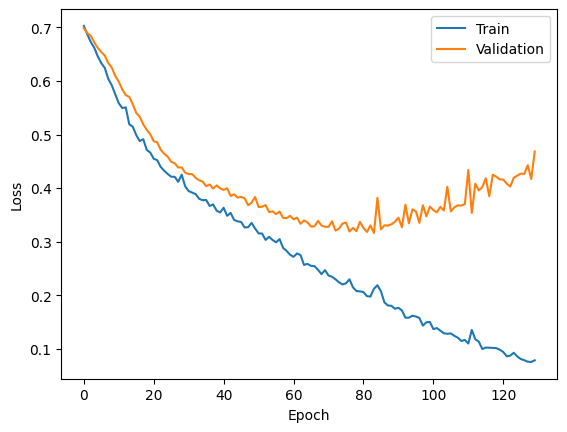

In [7]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')